## Initial Data Exploration ## 

In [13]:
# Import Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
sns.set_style('ticks')

In [16]:
# Import CSV file

In [17]:
df = pd.read_csv('Correct_Dataset.csv')

In [18]:
# Look at some of the descriptive statistics

In [19]:
df.head()

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [20]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


<AxesSubplot:>

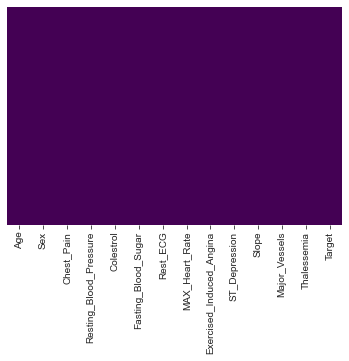

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
#There are no null values within the dataset

In [23]:
df.shape

(303, 14)

In [24]:
# Next, lets take a look at the distribution of age, resting bp, cholesterol, and max heart rate

<Figure size 1152x576 with 0 Axes>

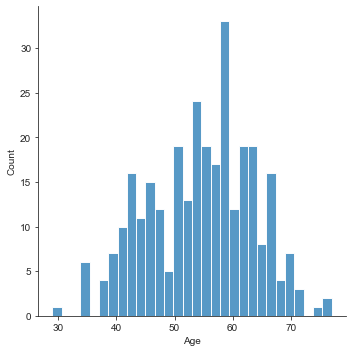

In [25]:
plt.figure(figsize=(16,8))
sns.displot(x=df['Age'], bins = 30)

<Figure size 1152x576 with 0 Axes>

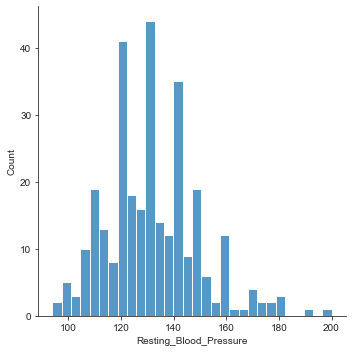

In [26]:
plt.figure(figsize=(16,8))
sns.displot(x=df['Resting_Blood_Pressure'], bins = 30)

<Figure size 1152x576 with 0 Axes>

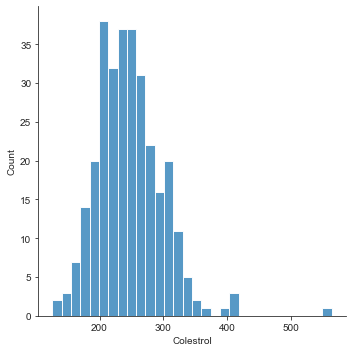

In [27]:
plt.figure(figsize=(16,8))
sns.displot(x=df['Colestrol'], bins = 30)

# Is the value above 500 an outlier? We can use the formula = > Q3 + 1.5 * the IQR to determine that!

In [28]:
def cholesterol_outlier(num):
    if num < 275 + (1.5 *  (275 - 211)):
        print(f'{num} is not an outlier')
    return print(f'{num} is an outlier')

In [29]:
cholesterol_outlier(564)

564 is an outlier


## We made a function that will apply the outlier function to the number we suspect is an outlier in the cholesterol column of our dataset and determined it was an outlier. As such this data point will not be included in our analysis

In [30]:
df['Colestrol'].idxmax()

152

In [31]:
df.iloc[152]

Age                          67
Sex                           0
Chest_Pain                    3
Resting_Blood_Pressure      115
Colestrol                   564
Fasting_Blood_Sugar           0
Rest_ECG                      2
MAX_Heart_Rate              160
Exercised_Induced_Angina      0
ST_Depression               1.6
Slope                         2
Major_Vessels                 0
Thalessemia                   7
Target                        0
Name: 152, dtype: object

In [32]:
df.drop([152], axis=0, inplace=True)

In [33]:
print(df.describe())

              Age         Sex  Chest_Pain  Resting_Blood_Pressure   Colestrol  \
count  302.000000  302.000000  302.000000              302.000000  302.000000   
mean    54.397351    0.682119    3.158940              131.745033  245.642384   
std      9.024573    0.466426    0.961676               17.602605   48.519591   
min     29.000000    0.000000    1.000000               94.000000  126.000000   
25%     48.000000    0.000000    3.000000              120.000000  211.000000   
50%     55.500000    1.000000    3.000000              130.000000  240.500000   
75%     61.000000    1.000000    4.000000              140.000000  274.750000   
max     77.000000    1.000000    4.000000              200.000000  417.000000   

       Fasting_Blood_Sugar    Rest_ECG  MAX_Heart_Rate  \
count           302.000000  302.000000      302.000000   
mean              0.149007    0.986755      149.572848   
std               0.356686    0.994916       22.905112   
min               0.000000    0.000000

<Figure size 1152x576 with 0 Axes>

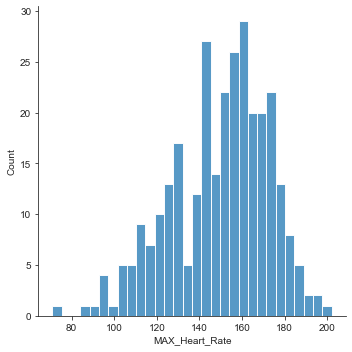

In [34]:
plt.figure(figsize=(16,8))
sns.displot(x=df['MAX_Heart_Rate'], bins = 30)

# The rest of the data looks good. Next, we will look at the distributions and their association with the target class

In [35]:
df.to_csv('heart_disease_cleaned.csv')